In [365]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [380]:
allcalls=pd.read_csv("main_calls_1.csv")
fireworks=allcalls[allcalls.incident_type.str.contains("FIREWORKS")]
fireworks['datetime']=fireworks.date+" "+fireworks.time
fireworks['datetime']=pd.to_datetime(fireworks.datetime)
fw1=fireworks[['towns','response_time','transport_time','total_time','datetime']]
july4_calls=fw1[(fw1.datetime.dt.month==7)&(fw1.datetime.dt.day==4)]
emscalls=allcalls[allcalls.ems_call=='EMS']
emscalls['datetime']=emscalls.date+" "+emscalls.time
emscalls['datetime']=pd.to_datetime(emscalls.datetime)
emsj4=emscalls[(emscalls.datetime.dt.month==7)&(emscalls.datetime.dt.day==4)]
emsj4=emsj4[['incident_number', 'incident_type','towns','response_time', 'transport_time', 'total_time',
       'ems_call', 'datetime']]
buckstowns=gpd.read_file('bucks_towns.rar/bucks_towns.shp')
buckstowns['type1']=buckstowns.class_of_m.str.replace('2TWP|1TWP','township').str.replace('BORO','borough')
buckstowns['towns']=buckstowns.municipa_1.str.lower()+" "+buckstowns.type1
map1=buckstowns[['towns','geometry']]

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

## So let's take a look first at Firework Call frequency by hour and minute for all years. Blue will represent all calls all years, and orange will represent all calls on the 4th of July for all years.

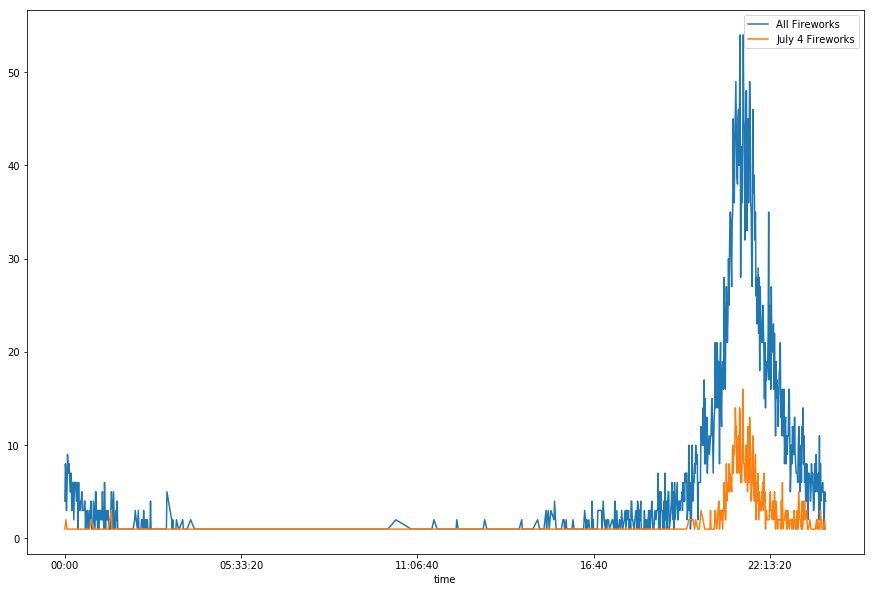

In [389]:
fw1.datetime.dt.time.value_counts().sort_index().plot(kind='line',figsize=(15,10),legend=True,label="All Fireworks")
july4_calls.datetime.dt.time.value_counts().sort_index().plot(kind='line',figsize=(15,10),legend=True,label='July 4 Fireworks')

## Police tend to answer the most fireworks calls between about 9 p.m. until about 11 p.m. any day of the year.
## Calls on the 4th of July appear to be no different. 

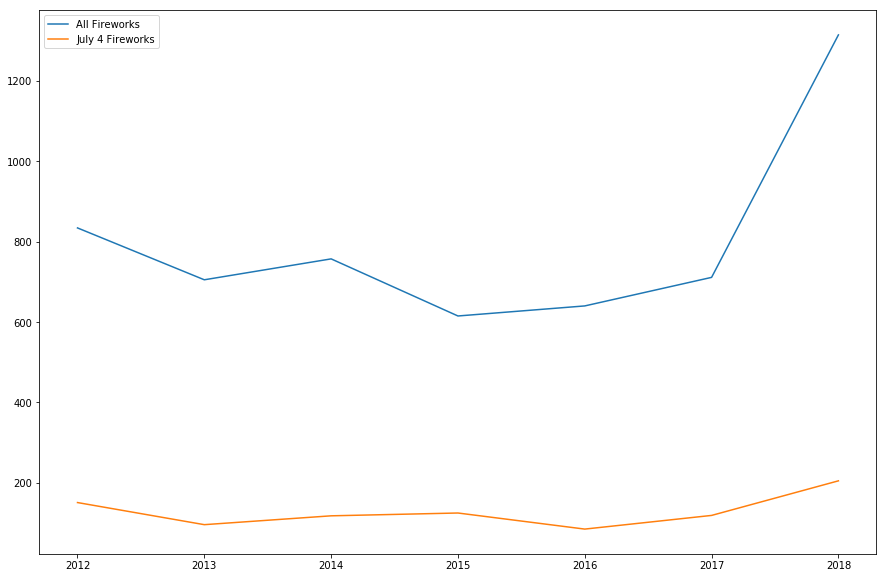

In [390]:
fw1.datetime.dt.year.value_counts().sort_index().plot(kind='line',figsize=(15,10),legend=True,label="All Fireworks")
july4_calls.datetime.dt.year.value_counts().sort_index().plot(kind='line',figsize=(15,10),legend=True,label="July 4 Fireworks")

## This is very interesting. I had to double check the data to make sure there weren't repeated calls. It appears 2018 did have the most fireworks calls in general and on the 4th of July than in any previous year in the data.
## Let's see if the total calls also means the most time spent on fireworks calls for both.

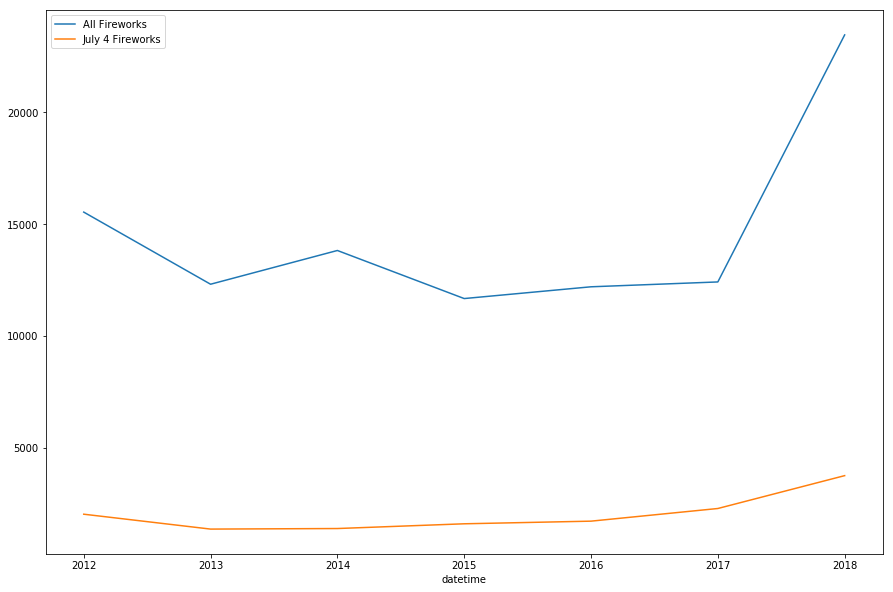

In [391]:
fw1.groupby([fw1.datetime.dt.year]).total_time.sum().plot(kind='line',figsize=(15,10),legend=True,label="All Fireworks")
july4_calls.groupby([fw1.datetime.dt.year]).total_time.sum().plot(kind='line',figsize=(15,10),legend=True,label="July 4 Fireworks")

## This is a little tricky to make draw any real conclusions. Total time on fireworks calls overall and on July 4 follow pretty much the same patter as the total number of calls above. If we're looking at purley the overall fireworks calls, then it would appear that moer fireworks calls does mean more time spent on fireworks calls. If we're looking only at 4th of July calls, then we need to look a little closer.
## The overall calls and total time for all calls charts follow each other very closely. The 4th of July total calls chart, however, shows a drop in total time from 2012 to 2013, and then a steady increase for every year after (sharply rising in 2018). The total number of July 4 calls increased in 2014 and again in 2015 before dropping in 2016. I feel that total time should have followed the same spike if there was a direct correlation. 
## When it comes to 4th of July fireworks calls, it is probably safest to say police are spending and increasing amount of time on those calls each year.

In [392]:
h1=fw1.towns.value_counts().to_frame().rename(columns={"towns":'call_counts'}).reset_index().rename(columns={'index':'towns'})

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


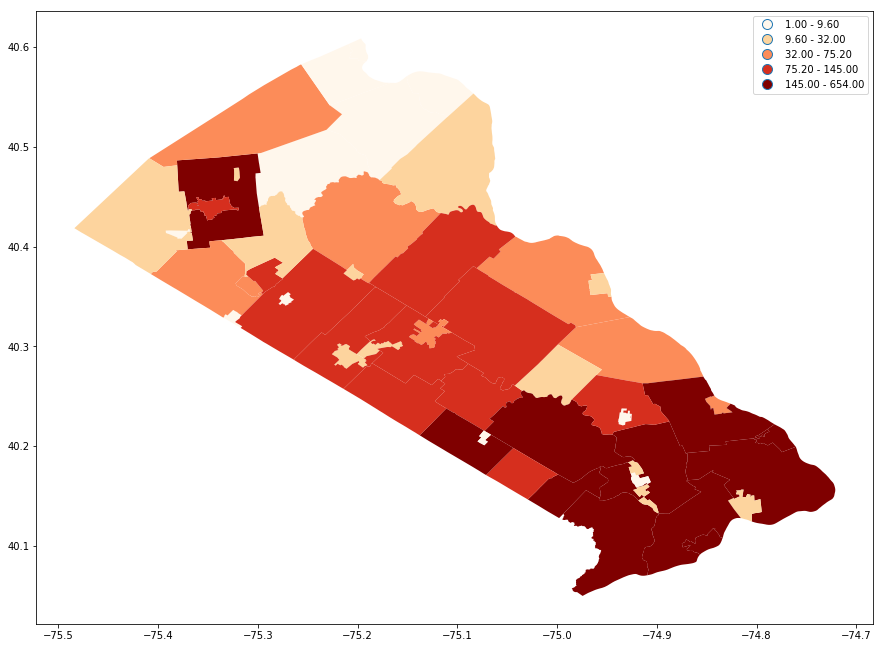

In [393]:
pd.merge(map1,h1,on='towns').plot(column='call_counts',scheme='quantiles',cmap='OrRd',legend=True,figsize=(15,15))

## There's been at least 1 fireworks call in everytown in Bucks County in the last six years. Towns in lower Bucks County seems to have had by far the most calls compared to other regions. The darkest qauntile in this map ranges between 145 to 654 total calls. 

In [394]:
h2=july4_calls.towns.value_counts().to_frame().rename(columns={"towns":'call_counts'}).reset_index().rename(columns={'index':'towns'})

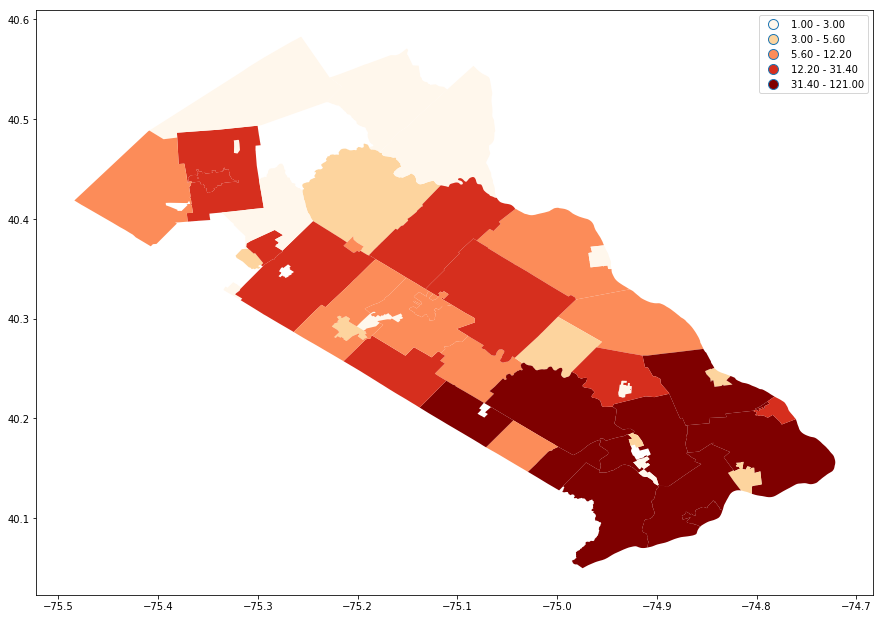

In [395]:
pd.merge(map1,h2,on='towns').plot(column='call_counts',scheme='quantiles',cmap='OrRd',legend=True,figsize=(15,15))

## If we only focus on the 4th of July, we still see the same concentration of calls in lower Bucks. Of course, there's a great deal fewer calls since we effectively ignore 364 other days. Still, I think there's an interesting thing to consider from all of this.
## Looking back at our line charts and maps, both for all calls and the 4th of July alone, I wonder if it's fair to say the 4th of July can also act as a general representation for fireworks calls? But, that's another question for another day.